In [1]:
from fastai.vision.all import *
import fastai
import timm
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

In [2]:
import torch
torch.cuda.set_device(2)

In [3]:
df = pd.read_csv('data/wheat_new.csv',decimal=',')

In [4]:
df

,Unnamed: 0,file,DAS,plot nº,photo nº,species,water_treatment,management,plot m2,avg_water (L m-2),...,P (kg microplot-1),K (kg microplot-1),avg_height,GA,GGA,CSI,NGRDIveg,TGIveg,final yield (kg),dataset
0,0,20220517_1 (1).JPG,96,1,(1).,wheat,ww,conv,12,3096.2375,...,0.072,0.072,46.9715,0.959407,0.904393,5.734098,0.1324,2569.2709,9.15,train
1,1,20220517_1 (2).JPG,96,1,(2).,wheat,ww,conv,12,3096.2375,...,0.072,0.072,46.9715,0.963030,0.905523,5.971505,0.1316,2648.0105,9.15,train
2,2,20220517_1 (3).JPG,96,1,(3).,wheat,ww,conv,12,3096.2375,...,0.072,0.072,46.9715,0.953708,0.898722,5.765430,0.1331,2736.4337,9.15,train
3,3,20220517_1 (4).JPG,96,1,(4).,wheat,ww,conv,12,3096.2375,...,0.072,0.072,46.9715,0.957117,0.898772,6.095965,0.1267,2550.8238,9.15,train
4,4,20220602_1 (1).JPG,112,1,(1).,wheat,ww,conv,12,3096.2375,...,0.072,0.072,46.9715,0.892348,0.791199,11.335180,0.1008,1880.2128,9.15,train
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
251,251,20220615_25 (4).JPG,125,25,(4).,wheat,d,conv,12,2752.8000,...,0.072,0.072,55.2110,0.788544,0.323428,58.984136,0.0491,2277.6824,7.95,test
252,252,20220701_25 (1).JPG,141,25,(1).,wheat,d,conv,12,2752.8000,...,0.072,0.072,55.2110,0.031868,0.009072,71.532905,0.0342,946.1760,7.95,test
253,253,20220701_25 (2).JPG,141,25,(2).,wheat,d,conv,12,2752.8000,...,0.072,0.072,55.2110,0.025828,0.006849,73.483356,0.0314,867.4491,7.95,test
254,254,20220701_25 (3).JPG,141,25,(3).,wheat,d,conv,12,2752.8000,...,0.072,0.072,55.2110,0.022065,0.004773,78.367629,0.0196,855.3556,7.95,test


In [5]:
scaler = MinMaxScaler()

In [6]:
df.columns

Index(['Unnamed: 0', 'file', 'DAS', 'plot nº', 'photo nº', 'species',
       'water_treatment', 'management', 'plot m2', 'avg_water (L m-2)',
       'N (kg microplot-1)', 'P (kg microplot-1)', 'K (kg microplot-1)',
       'avg_height', 'GA', 'GGA', 'CSI', 'NGRDIveg', 'TGIveg',
       'final yield (kg)', 'dataset'],
      dtype='object')

In [7]:
dftrain = df[(df.dataset=='train')]
dftrain.loc[:,['plot m2', 'avg_water (L m-2)',
       'N (kg microplot-1)', 'P (kg microplot-1)', 'K (kg microplot-1)',
       'avg_height', 'GA', 'GGA', 'CSI', 'NGRDIveg', 'TGIveg',
       'final yield (kg)']] = scaler.fit_transform(dftrain[['plot m2', 'avg_water (L m-2)',
       'N (kg microplot-1)', 'P (kg microplot-1)', 'K (kg microplot-1)',
       'avg_height', 'GA', 'GGA', 'CSI', 'NGRDIveg', 'TGIveg',
       'final yield (kg)']])
dfvalid = df[(df.dataset=='validation')]
dftest = df[(df.dataset=='test')]
dfvalid.loc[:,['plot m2', 'avg_water (L m-2)',
       'N (kg microplot-1)', 'P (kg microplot-1)', 'K (kg microplot-1)',
       'avg_height', 'GA', 'GGA', 'CSI', 'NGRDIveg', 'TGIveg',
       'final yield (kg)']] = scaler.transform(dfvalid[['plot m2', 'avg_water (L m-2)',
       'N (kg microplot-1)', 'P (kg microplot-1)', 'K (kg microplot-1)',
       'avg_height', 'GA', 'GGA', 'CSI', 'NGRDIveg', 'TGIveg',
       'final yield (kg)']])        
dftest.loc[:,['plot m2', 'avg_water (L m-2)',
       'N (kg microplot-1)', 'P (kg microplot-1)', 'K (kg microplot-1)',
       'avg_height', 'GA', 'GGA', 'CSI', 'NGRDIveg', 'TGIveg',
       'final yield (kg)']] = scaler.transform(dftest[['plot m2', 'avg_water (L m-2)',
       'N (kg microplot-1)', 'P (kg microplot-1)', 'K (kg microplot-1)',
       'avg_height', 'GA', 'GGA', 'CSI', 'NGRDIveg', 'TGIveg',
       'final yield (kg)']])                   

In [8]:
dftrain = pd.concat([dftrain,dfvalid])

In [9]:
df = pd.concat([dftrain,dftest])

In [10]:
dftrain.loc[:,'dataset'] =  dftrain['dataset'].apply(lambda x: x=='validation')
df.loc[:,'dataset'] =  df['dataset'].apply(lambda x: x=='test')

In [11]:
# dftrain.loc[:,'final yield (kg)'] = dftrain['final yield (kg)'].apply(lambda x : (x - 0.8579)/(10.55-0.8579))
# df.loc[:,'final yield (kg)'] = df['final yield (kg)'].apply(lambda x : (x - 0.8579)/(10.55-0.8579))

In [12]:
db = DataBlock(blocks = (ImageBlock,
                         RegressionBlock(),RegressionBlock(),RegressionBlock(),RegressionBlock(),
                         RegressionBlock(),RegressionBlock(),RegressionBlock(),RegressionBlock(),
                         RegressionBlock(),RegressionBlock(),RegressionBlock(),RegressionBlock()),
                 get_x=[ColReader('file',pref='wheat_all/')],
                 get_y=[
                     #ColReader('water_treatment'),
                     #   ColReader('management'),
                        ColReader('plot m2'),
                        ColReader('avg_water (L m-2)'),
                        ColReader('N (kg microplot-1)'),
                        ColReader('P (kg microplot-1)'),
                        ColReader('K (kg microplot-1)'),
                        ColReader('avg_height'),
                        ColReader('GA'),
                        ColReader('GGA'),
                        ColReader('CSI'),
                        ColReader('NGRDIveg'),
                        ColReader('TGIveg'),
                        ColReader('final yield (kg)')],
                 splitter=ColSplitter(col='dataset'),    
                 item_tfms = Resize(640),
                 batch_tfms=[*aug_transforms(size=512,flip_vert=True,
                                            max_zoom=1.0), Normalize.from_stats(*imagenet_stats)],
               n_inp=1)
dls = db.dataloaders(dftrain,bs=4)

In [13]:
from fastai.vision.all import *
callbacks = [
    ShowGraphCallback(),
    # EarlyStoppingCallback(patience=5),
    SaveModelCallback(fname='convnext_yield_all_minmax_output'),
    ReduceLROnPlateau()
    
]

In [14]:
from fastai.metrics import mae,rmse,mse

In [15]:
class MultiOutputModel(Module):
  "A three-headed model given a `body` and `n` output features"
  def __init__(self, body:nn.Sequential):
    nf = num_features_model(nn.Sequential(*body.children()))
    self.body = body
    #self.water_treatment = create_head(nf, 4)
    #self.management = create_head(nf, 2)
    self.avg_water = create_head(nf,1)
    self.n = create_head(nf,1)
    self.p = create_head(nf,1)
    self.k = create_head(nf,1)
    self.avg_height = create_head(nf,1)
    self.ga = create_head(nf,1)
    self.gga = create_head(nf,1)
    self.csi = create_head(nf,1)
    self.NGRDIveg = create_head(nf,1)
    self.TGIveg = create_head(nf,1)
    self.yieldprod = create_head(nf,1)

    
    
  
  def forward(self, x):
    y = self.body(x)
    return [
        #self.water_treatment(y),
        #self.management(y),
        self.avg_water(y),
        self.n(y),
        self.p(y),
        self.k(y),
        self.avg_height(y),
        self.ga(y),
        self.gga(y),
        self.csi(y),
        self.NGRDIveg(y),
        self.TGIveg(y),
        self.yieldprod(y)]

In [16]:
from wwf.vision.timm import *

body = create_timm_body('convnext_base', pretrained=True)
# body = create_body(resnet50, pretrained=True)
net = MultiOutputModel(body)

In [17]:
class CombinationLoss(Module):
    "Cross Entropy Loss on multiple targets"
    def __init__(self, func1=F.cross_entropy,func2=F.mse_loss, weights=[2, 1]):
        self.func1, self.func2, self.w = func2, func2, weights

    def forward(self, xs, *ys, reduction='mean'):
        res = self.func2(ys[0],torch.reshape(xs[0],(4,1)))
        for i in range(1,10):
            res = res + self.func2(ys[i],torch.reshape(xs[i],(4,1)))
        res = res + self.func2(ys[10],torch.reshape(xs[10],(4,1)))
        return res
    
#         for i, w, x, y in zip(range(len(xs)), self.w, xs, ys):
#             print(x[1])
#             print(y[1])
#             if i == 0: loss = self.func2(x[1], y[1], reduction=reduction) 
#             else: loss += self.func2(x[1], y[1], reduction=reduction) 
        
#         return loss

In [18]:
learn = Learner(dls, net, loss_func=CombinationLoss(),cbs=callbacks)

In [19]:
# learn.lr_find()

In [20]:
learn.freeze()

epoch,train_loss,valid_loss,time
0,10.626117,5.482366,00:25
1,10.820633,8.836372,00:24
2,10.358228,12.221082,00:25
3,10.191327,387.254761,00:26
4,9.403375,914.082275,00:26
5,7.314957,20.582523,00:26
6,5.713004,7.695083,00:26
7,4.770769,3.310756,00:26
8,4.253959,2.622578,00:26
9,3.898052,2.946383,00:26


/tmp/ipykernel_1925635/3432634807.py:7: UserWarning: Using a target size (torch.Size([4, 1])) that is different to the input size (torch.Size([4])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  res = self.func2(ys[0],torch.reshape(xs[0],(4,1)))
/tmp/ipykernel_1925635/3432634807.py:9: UserWarning: Using a target size (torch.Size([4, 1])) that is different to the input size (torch.Size([4])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  res = res + self.func2(ys[i],torch.reshape(xs[i],(4,1)))
/tmp/ipykernel_1925635/3432634807.py:10: UserWarning: Using a target size (torch.Size([4, 1])) that is different to the input size (torch.Size([4])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  res = res + self.func2(ys[10],torch.reshape(xs[10],(4,1)))


Better model found at epoch 0 with valid_loss value: 5.48236608505249.


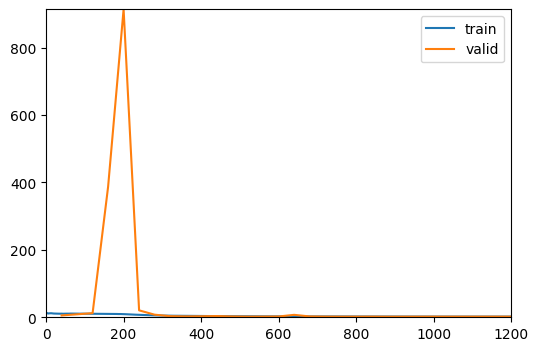

Epoch 1: reducing lr to 1.9509952043783824e-05
Epoch 2: reducing lr to 3.6689954459893676e-05
Epoch 3: reducing lr to 5.651719474411482e-05
Epoch 4: reducing lr to 7.556338320136515e-05
Epoch 5: reducing lr to 9.053524016677912e-05
Epoch 6: reducing lr to 9.884400480834486e-05
Better model found at epoch 7 with valid_loss value: 3.310756206512451.
Better model found at epoch 8 with valid_loss value: 2.622577667236328.
Epoch 9: reducing lr to 9.704406724617597e-05
Epoch 10: reducing lr to 9.422910561635695e-05
Better model found at epoch 11 with valid_loss value: 2.4590952396392822.
Better model found at epoch 12 with valid_loss value: 1.9385381937026978.
Epoch 13: reducing lr to 8.09206101058707e-05
Epoch 14: reducing lr to 7.515124567768344e-05
Epoch 15: reducing lr to 6.889234631742125e-05
Epoch 16: reducing lr to 6.226574728568802e-05
Epoch 17: reducing lr to 5.5400410207283585e-05
Better model found at epoch 18 with valid_loss value: 1.8614248037338257.
Better model found at epoch 

In [21]:
learn.fit_one_cycle(30,lr_max=1e-3)

In [22]:
learn.unfreeze()

epoch,train_loss,valid_loss,time
0,2.173848,1.826310,00:26
1,2.117953,1.849285,00:26
2,2.124676,1.875238,00:26
3,2.167261,1.893978,00:26
4,2.161741,2.078286,00:27
5,2.106384,1.861360,00:26
6,2.108902,1.828453,00:26
7,2.105160,2.047769,00:26
8,2.118198,1.910014,00:26
9,2.113226,1.947165,00:26


/tmp/ipykernel_1925635/3432634807.py:7: UserWarning: Using a target size (torch.Size([4, 1])) that is different to the input size (torch.Size([4])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  res = self.func2(ys[0],torch.reshape(xs[0],(4,1)))
/tmp/ipykernel_1925635/3432634807.py:9: UserWarning: Using a target size (torch.Size([4, 1])) that is different to the input size (torch.Size([4])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  res = res + self.func2(ys[i],torch.reshape(xs[i],(4,1)))
/tmp/ipykernel_1925635/3432634807.py:10: UserWarning: Using a target size (torch.Size([4, 1])) that is different to the input size (torch.Size([4])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  res = res + self.func2(ys[10],torch.reshape(xs[10],(4,1)))


Better model found at epoch 0 with valid_loss value: 1.8263100385665894.


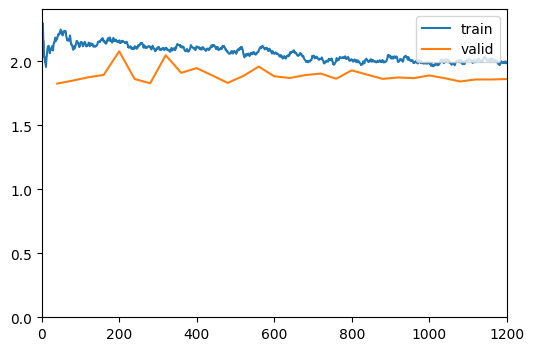

Epoch 1: reducing lr to 1.950995204378382e-06
Epoch 2: reducing lr to 3.6689954459893678e-06
Epoch 3: reducing lr to 5.651719474411482e-06
Epoch 4: reducing lr to 7.556338320136516e-06
Epoch 5: reducing lr to 9.053524016677912e-06
Epoch 6: reducing lr to 9.884400480834486e-06
Epoch 7: reducing lr to 9.989007430979442e-06
Epoch 8: reducing lr to 9.894337945978932e-06
Epoch 9: reducing lr to 9.704406724617599e-06
Epoch 10: reducing lr to 9.422910561635695e-06
Epoch 11: reducing lr to 9.055328458996445e-06
Epoch 12: reducing lr to 8.608814983357768e-06
Epoch 13: reducing lr to 8.092061010587072e-06
Epoch 14: reducing lr to 7.515124567768344e-06
Epoch 15: reducing lr to 6.889234631742125e-06
Epoch 16: reducing lr to 6.226574728568802e-06
Epoch 17: reducing lr to 5.540041020728359e-06
Epoch 18: reducing lr to 4.842997924874708e-06
Epoch 19: reducing lr to 4.149010280668246e-06
Epoch 20: reducing lr to 3.4715889818189746e-06
Epoch 21: reducing lr to 2.8239156690222238e-06
Epoch 22: reducing 

In [23]:
learn.fit_one_cycle(30,lr_max=1e-4)

In [24]:
dls = db.dataloaders(df,bs=4)

In [25]:
learn.dls=dls

In [26]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [27]:
preds,gt = learn.get_preds()

/tmp/ipykernel_1925635/3432634807.py:7: UserWarning: Using a target size (torch.Size([4, 1])) that is different to the input size (torch.Size([4])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  res = self.func2(ys[0],torch.reshape(xs[0],(4,1)))
/tmp/ipykernel_1925635/3432634807.py:9: UserWarning: Using a target size (torch.Size([4, 1])) that is different to the input size (torch.Size([4])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  res = res + self.func2(ys[i],torch.reshape(xs[i],(4,1)))
/tmp/ipykernel_1925635/3432634807.py:10: UserWarning: Using a target size (torch.Size([4, 1])) that is different to the input size (torch.Size([4])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  res = res + self.func2(ys[10],torch.reshape(xs[10],(4,1)))


In [28]:
mean_absolute_error(gt[-1]*(10.55-0.8579)+0.8579,preds[-1]*(10.55-0.8579)+0.8579)

3.784659

In [29]:
mean_squared_error(gt[-1]*(10.55-0.8579)+0.8579,preds[-1]*(10.55-0.8579)+0.8579)

17.462564

In [30]:
math.sqrt(mean_squared_error(gt[-1]*(10.55-0.8579)+0.8579,preds[-1]*(10.55-0.8579)+0.8579))

4.17882333538806

In [31]:
preds[-1]

tensor([[0.3705],
        [0.3840],
        [0.3657],
        [0.4171],
        [0.3310],
        [0.3852],
        [0.4292],
        [0.3957],
        [0.3681],
        [0.4035],
        [0.3369],
        [0.4213],
        [0.4221],
        [0.4152],
        [0.4132],
        [0.3808],
        [0.4421],
        [0.4591],
        [0.4296],
        [0.4251],
        [0.3445],
        [0.3956],
        [0.3902],
        [0.3886],
        [0.3628],
        [0.4641],
        [0.3388],
        [0.3129],
        [0.3658],
        [0.3943],
        [0.3867],
        [0.3815],
        [0.3847],
        [0.3908],
        [0.3620],
        [0.4025],
        [0.3355],
        [0.3392],
        [0.3890],
        [0.3863],
        [0.3643],
        [0.4101],
        [0.3082],
        [0.4220],
        [0.3626],
        [0.3791],
        [0.4157],
        [0.4153],
        [0.4576],
        [0.4403],
        [0.4484],
        [0.4284],
        [0.3598],
        [0.3806],
        [0.3652],
        [0